In [1]:
import  numpy  as np
import  f_shadow as sh
import  matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=4,suppress=True)
np.set_printoptions(linewidth=np.inf)

In [3]:
n_p = 2         # number of particles
n_l = 10        # number of lattice sites
n_u = 100       # number of random unitary transformations
n_m = -1        # number of projective measurements per random unitary
                #... if n_u<0 we consider n_u=infinity

##### HERE WE CONSIDER EXACT MEASUREMENTS - n_u = infinity    
    
n_lbig = n_l*10 # size of larger empty lattice

NL = range(n_l)

# creating a one body density matrix to be reconstructed
dm_1  = np.array([[ np.cos((i-j)*np.pi/4)/(1+np.abs(i-j)) for i in NL] for j in NL]) 
dm_1 *= n_p/np.trace(dm_1)

# creating a one body density matrix to be reconstructed
dm_2  = np.array([[[[ np.cos((i-j+k-l)*np.pi/4)/(1+np.abs(i-j+k-l)) for i in NL] for j in NL] for k in NL] for l in NL]) 
dm_2 *= n_p**2/np.sum([dm_2[i,i,i,i] for i in NL])

# reconstruction of the matrix by averaging measurements after random unitary
# MM -> reconstructed matrix
# SS -> stantistical errors
mat1, mat2 = sh.shadow(dm_1, dm_2, n_lbig, n_u, n_m)

MM1 = np.mean(mat1, axis=0)
MM2 = np.mean(mat2, axis=0)

SS1 = np.std(mat1, axis=0)/np.sqrt(n_u)
SS2 = np.std(mat2, axis=0)/np.sqrt(n_u)

In [4]:
# we define a reconstruction accuracy 
acc_1 = np.abs(dm_1-MM1.real)
acc_2 = np.abs(dm_2-MM2.real)

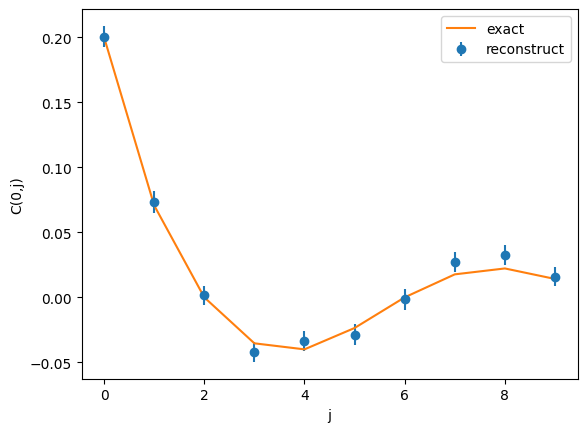

In [5]:
# We plot the first line of the reconstructed one body density matrix

x  = np.array([x for x in range(n_l)])

y  = MM1[0].real
dy = SS1[0]

real_y = dm_1[0]

plt.errorbar(x, y, yerr=dy, marker='o', linestyle='None', label='reconstruct');
plt.plot(x, real_y, label='exact')

plt.xlabel("j")
plt.ylabel("C(0,j)")

plt.legend()

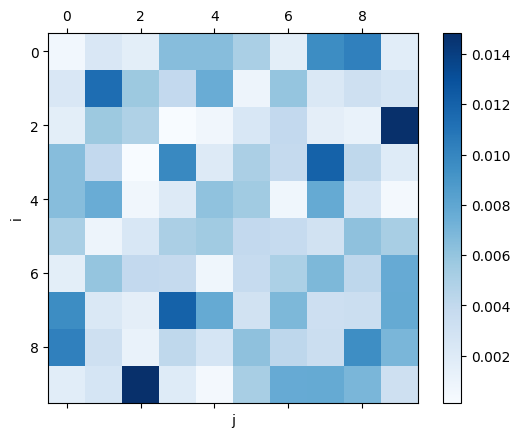

In [6]:
# We plot the accuracy for the full matrix C_ij

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(acc_1, interpolation='nearest', cmap='Blues')

plt.xlabel("j")
plt.ylabel("i")

fig.colorbar(cax)

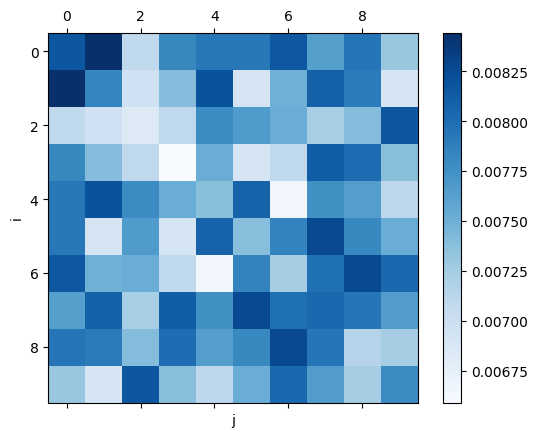

In [7]:
# We plot the statistical error for the full matrix C_ij

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(SS1, cmap='Blues', interpolation='none')

plt.xlabel("j")
plt.ylabel("i")

fig.colorbar(cax)

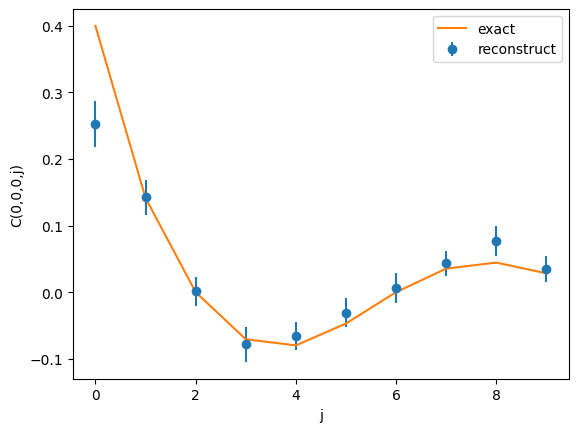

In [8]:
# We plot the i,j,k line of the reconstructed one body density matrix

i=0
j=0
k=0

x  = np.array([x for x in range(n_l)])

y  = MM2[i,j,k].real
dy = SS2[i,j,k]

real_y = dm_2[i,j,k]

plt.errorbar(x, y, yerr=dy, marker='o', linestyle='None', label='reconstruct');
plt.plot(x, real_y, label='exact')

plt.xlabel("j")
plt.ylabel("C(0,0,0,j)")

plt.legend()

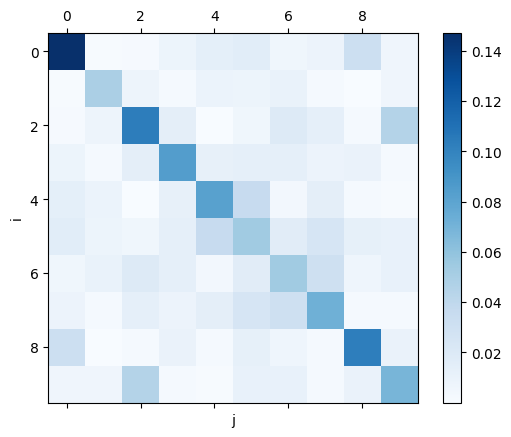

In [9]:
# We plot the accuracy for the full matrix C_ij

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(acc_2[i,j], interpolation='nearest', cmap='Blues')

plt.xlabel("j")
plt.ylabel("i")

fig.colorbar(cax)

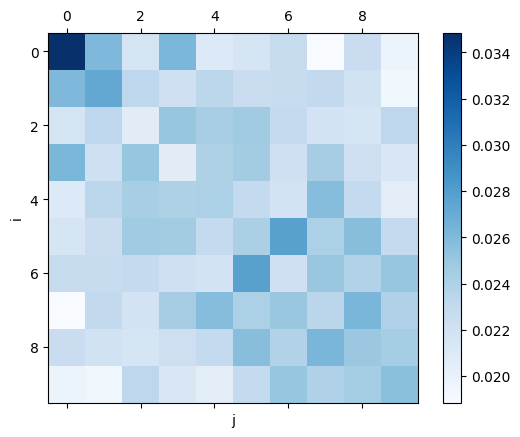

In [10]:
# We plot the statistical error for the full matrix C_ij

fig = plt.figure()
ax  = fig.add_subplot(111)
cax = ax.matshow(SS2[i,j], cmap='Blues', interpolation='none')

plt.xlabel("j")
plt.ylabel("i")

fig.colorbar(cax)